In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


In [11]:
Sample_rate = '5T'

df = pd.read_csv (r'C:\Users\conal\Desktop\MCM\Practicum\data\min,max,average gas 11-21 to 01-22.csv', header=0)
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'], format = '%Y-%m-%dT%H:%M:%SZ')
df = df.sort_values(by='block_timestamp',ascending=False)
df = df.set_index('block_timestamp')
df = df.squeeze()
df = df.astype('float')
df = df.resample(Sample_rate).mean()

In [115]:
df.describe()

,min_gas_price,max_gas_price,avg_gas_price
count,1.758100e+04,1.758100e+04,1.758100e+04
mean,1.095593e+11,5.484737e+11,1.224695e+11
std,6.702008e+10,1.539923e+12,7.970692e+10
min,2.770678e+10,4.330732e+10,3.320550e+10
25%,7.348175e+10,1.990773e+11,8.271597e+10
50%,9.752557e+10,3.032200e+11,1.089455e+11
75%,1.292282e+11,5.243243e+11,1.427822e+11
max,3.034150e+12,1.160990e+14,3.718088e+12


In [46]:
import matrixprofile as mp
from matrixprofile.visualize import plot_snippets

In [13]:
np_min = df['min_gas_price'].to_numpy()
np_avg = df['avg_gas_price'].to_numpy()
np_max = df['max_gas_price'].to_numpy()

In [ ]:
snippet_size = 288
num_snippets = 2

## Impute Data

In [14]:
preprocessing_kwargs = {
    'window': 5,
    'impute_method': 'mean',
    'impute_direction': 'forward',
    'add_noise': False
}

D:\Anaconda\lib\site-packages\matrixprofile\visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


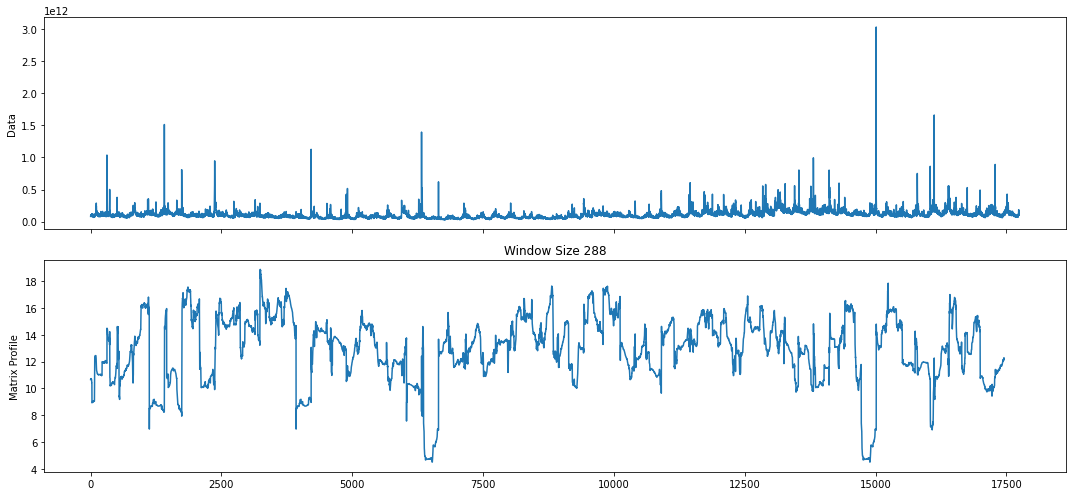

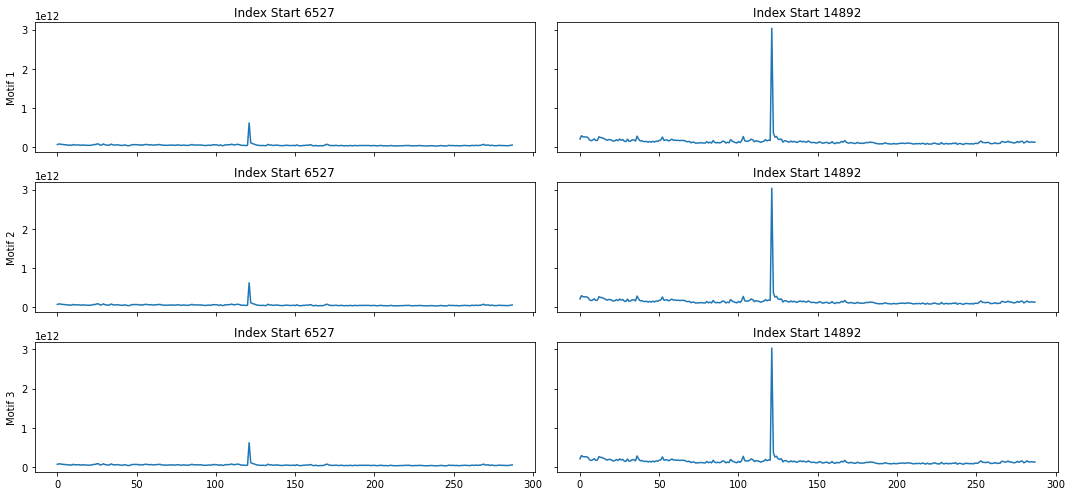

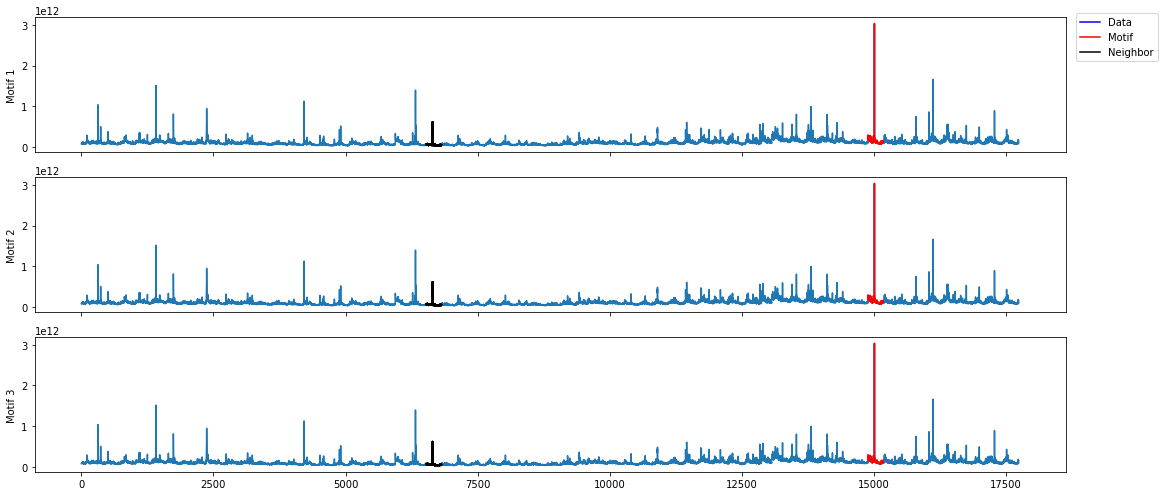

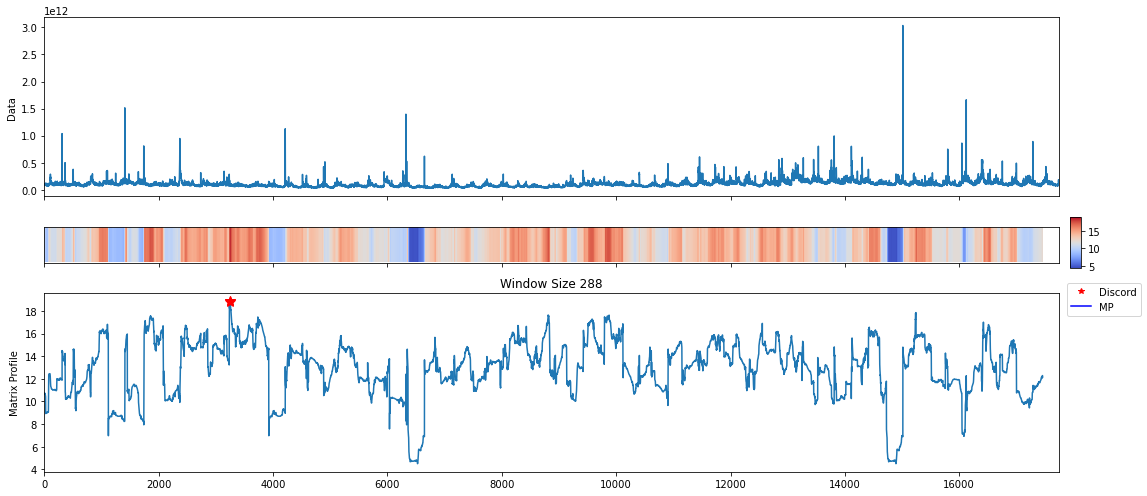

In [106]:
mp_profile, mp_figures = mp.analyze(np_min, windows=288, preprocessing_kwargs=preprocessing_kwargs, threshold=0.9)

## Weekly data

In [112]:
df_week = df.loc['2022-01-5':'2022-01-19']


In [113]:
np_min_week = df_week['min_gas_price'].to_numpy()
np_avg_week = df_week['avg_gas_price'].to_numpy()
np_max_week= df_week['max_gas_price'].to_numpy()

In [114]:
stats = mp.discover.statistics(np_min_week, 288)
stats

{'ts': array([           nan, 1.72268100e+11, 1.58207653e+11, ...,
        1.09007849e+11, 1.32196712e+11, 1.09516857e+11]),
 'min': nan,
 'max': nan,
 'mean': nan,
 'std': nan,
 'median': nan,
 'moving_min': array([nan, nan, nan, ..., nan, nan, nan]),
 'moving_max': array([nan, nan, nan, ..., nan, nan, nan]),
 'moving_mean': array([nan, nan, nan, ..., nan, nan, nan]),
 'moving_std': array([nan, nan, nan, ..., nan, nan, nan]),
 'moving_median': array([nan, nan, nan, ..., nan, nan, nan]),
 'window_size': 288,
 'class': 'Statistics'}

In [110]:
data_mp= mp.compute(np_min_week, windows=288,threshold=0.98, preprocessing_kwargs=preprocessing_kwargs)

D:\Anaconda\lib\site-packages\matrixprofile\visualize.py:481: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()
D:\Anaconda\lib\site-packages\matrixprofile\visualize.py:510: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


[<Figure size 1080x504 with 2 Axes>,
 <Figure size 1080x504 with 40 Axes>,
 <Figure size 1080x504 with 20 Axes>]

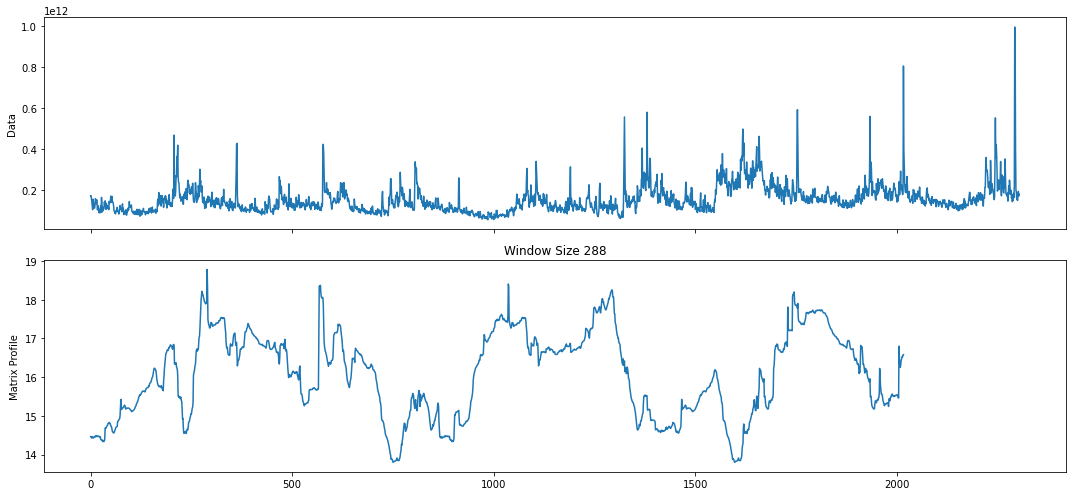

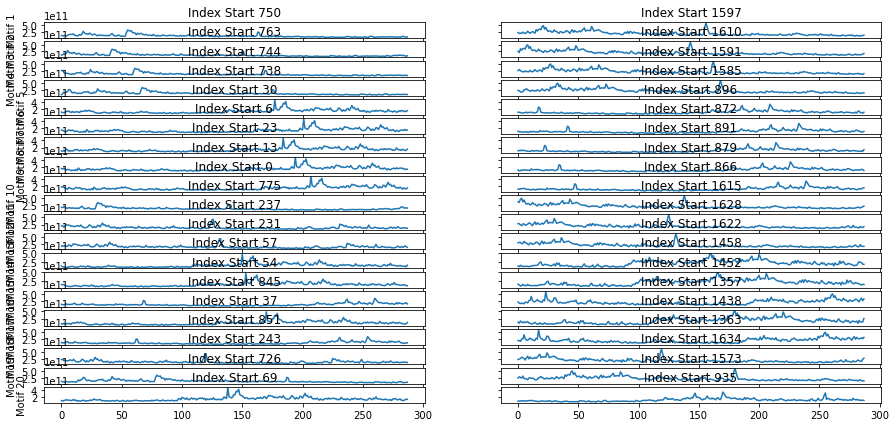

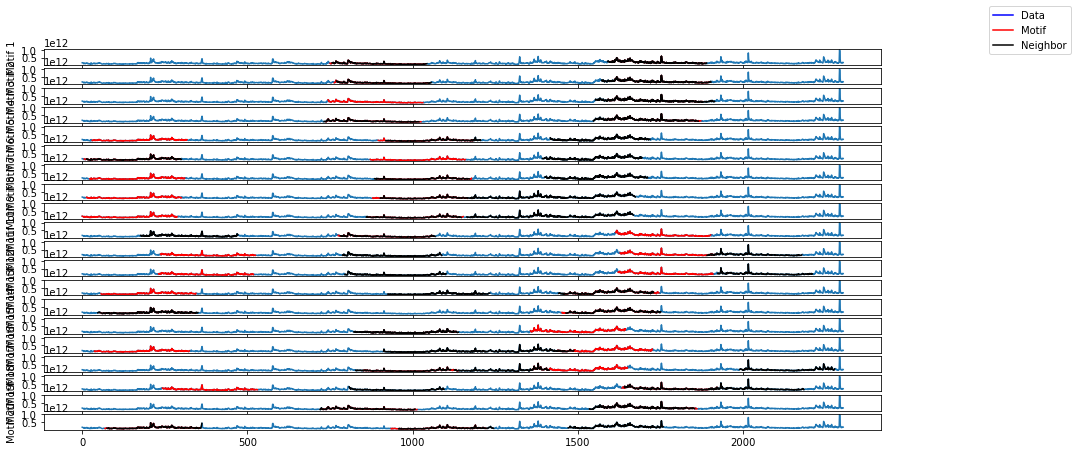

In [111]:
motifs = mp.discover.motifs(data_mp,k=20, max_neighbors=3, exclusion_zone=5)
mp.visualize(motifs)
